# Task 3 - Modeling


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We want to use dataframes to store and manipulate the data.

In [2]:
!pip install pandas

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [4]:
path = "/content/drive/MyDrive/Data/"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

## Section 3 - Data Cleaning


In [7]:
dfs = [sales_df, stock_df, temp_df]
for df in dfs:
    print("-"*60)
    print(df.info())

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  


### First of all , we observe that 'timestamp' column is the only column with incorrect type in all of three dataframes . We will clean this first .

In [8]:
def datetime_converter(data : pd.DataFrame, col : str):
    data[col] = pd.to_datetime(data[col], format='%Y-%m-%d %H:%M:%S')
    return data

In [9]:
for df in dfs :
    df = datetime_converter(df, 'timestamp')
    print('--'*60)
    print(df.info())

------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB
None
-----------------------------------------------------------------------------------------------------------------

### Further, we will predict stock levels **hourly** , so we have two choices :


1.   Merging on raw timestamp then convert to hourly timestamp .
2.   Converting to hourly timestamp then merging on that .

### The first choice let us get more data points to train our model on . But it is  very unlikely to happen , because it is very difficult , by chance or by transaction policy , to two transactions or more happen at exactely the same time . Thus we will convert to hour and then merge , for convenience .



In [10]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [11]:
sales_df = convert_timestamp_to_hourly(data=sales_df, column='timestamp')
stock_df = convert_timestamp_to_hourly(data=stock_df, column='timestamp')
temp_df = convert_timestamp_to_hourly(data=temp_df, column='timestamp')

### At this point ,  we will check for outliers or null values and get rid of them somehow if they exist and then move forward to feature engineering .

In [12]:
for df in dfs :
    print('-'*60)
    print(df.info())

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #  

In [13]:
!pip install seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temperature'>

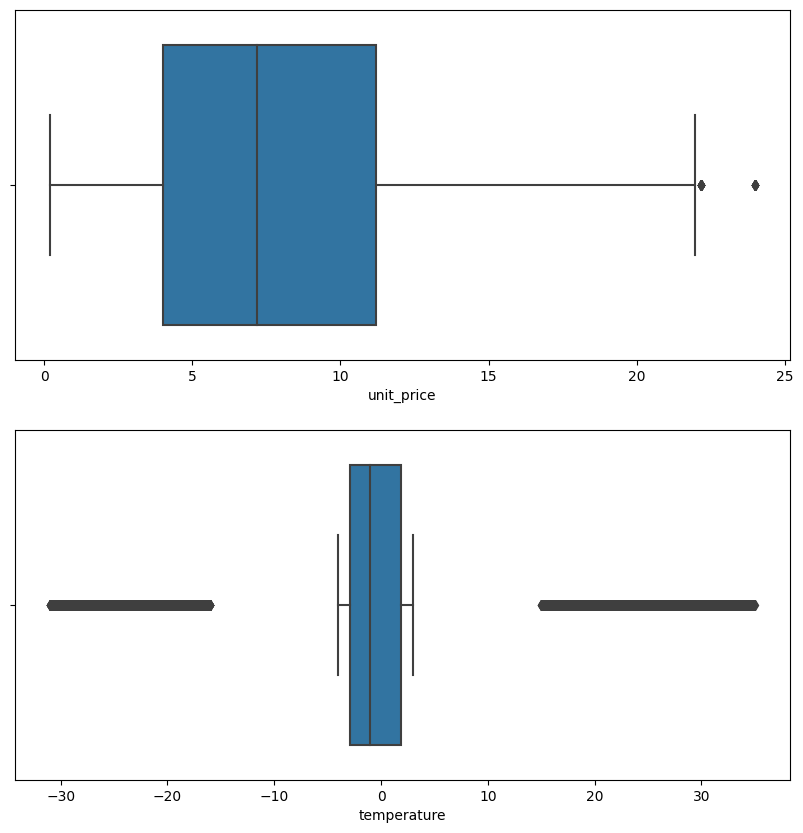

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.boxplot(data=sales_df, x='unit_price', width=0.8)

plt.subplot(2,1,2)
sns.boxplot(data=temp_df, x='temperature', width=0.8)

In [16]:
temp_df.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


### First, we observe that there is no null values in the hole dataset .
### Second, we observe only two outliers in the 'unit_price' column and I think we should keep them in the dataset ; if we get rid of all the transactions with this unit price means that we get rid of the products with this price .
### But, conserning the 'temperature' column there is a lot of outliers and it is essential to more explore that column and then decide .

In [17]:
f = (temp_df['temperature'] > 1.84) | (temp_df['temperature'] < -2.8)
outliers_percentage_tmp = (temp_df[f].shape[0] / temp_df.shape[0]) * 100

print(f"{round(outliers_percentage_tmp, 2)} % of the data are outliers")

50.74 % of the data are outliers


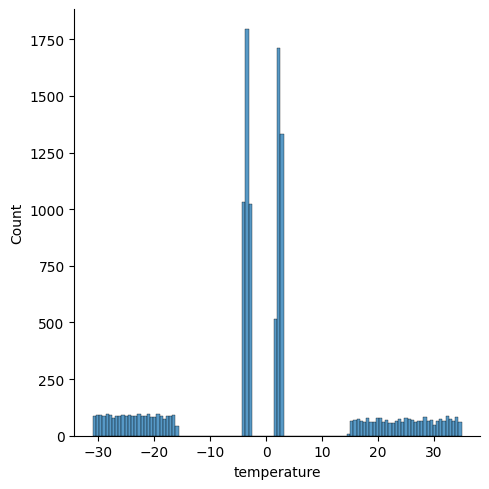

In [18]:
sns.displot(data = temp_df[f], x='temperature')

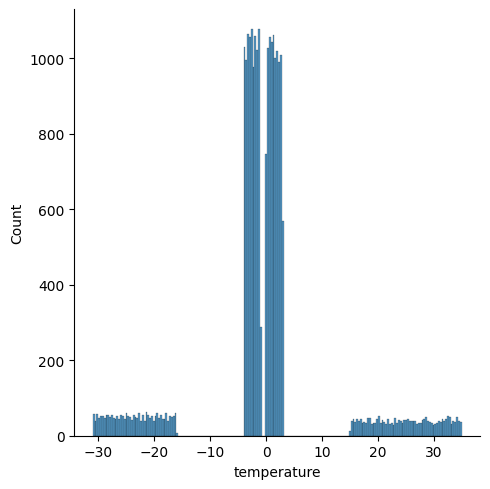

In [19]:
sns.displot(data=temp_df, x='temperature')

### We observe:


1.   Around 50% of temperature column are outliers .
2.   The distribution of this column looks like symmetric in both dataframes (original dataframe and outliers dataframe)

### Thus, we will keep all of these data points for now .



## Section 4 - Merging and more cleaning

### When we take a look at the data model diagram we understand how to merge the data :
### We group sales dataset and stock dataset by 'timestamp' and 'product_id' , then group temperature dataset by 'timestamp' and finally we merge it all together .
### Let's get started !

In [20]:
sales_df_agg = sales_df.groupby(['timestamp','product_id']).agg({'quantity':'sum'}).reset_index()
stock_df_agg = stock_df.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
temp_df_agg = temp_df.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()

In [21]:
sales_df_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11
...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [22]:
merged_df = sales_df_agg.merge(stock_df_agg, on=['product_id','timestamp'], how='right')
merged_df

,timestamp,product_id,quantity,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3.0,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3.0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,NaN,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,NaN,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,NaN,0.05
...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,4.0,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,NaN,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3.0,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3.0,0.92


In [23]:
merged_df = merged_df.merge(temp_df_agg, on=['timestamp'], how='left')
merged_df

,timestamp,product_id,quantity,estimated_stock_pct,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3.0,0.89,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3.0,0.14,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,NaN,0.67,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,NaN,0.82,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,NaN,0.05,-0.028850
...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,4.0,0.50,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,NaN,0.26,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3.0,0.78,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3.0,0.92,-0.165077


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   quantity             3067 non-null   float64       
 3   estimated_stock_pct  10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


### The .info() method tells us that the 'quantity' column has null values , so we have to deal with it somehow .
### Logically , we can assume that these null values come from the fact that there is no transaction during that hour timestamp , so we can fill these values with zeros .
### We have two choices in mind :


1.   Proceed as our assumption : Filling missing values (zeros)
2.   Use a robust predictive model to handle these missing values later :  (XGBoost).

### We will apply these two methods and choose between them after error analysis and validation .



## Section 5 - Feature Engineering

In [25]:
sales_df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:00:00,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:00,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


### From sales dataset we have two columns that can serve as a good features for predicting the stock levels of a product : the product category and the unit price .

In [26]:
product_category = sales_df[['product_id','category']].drop_duplicates()
product_price = sales_df[['product_id','unit_price']].drop_duplicates()

In [27]:
category_price_df = product_category.merge(product_price, on='product_id', how='left')
category_price_df

,product_id,category,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,4.49
...,...,...,...
295,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,14.99
296,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products,13.49
297,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,14.19
298,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,16.99


In [28]:
merged_df = merged_df.merge(category_price_df, on='product_id', how='left')
merged_df

,timestamp,product_id,quantity,estimated_stock_pct,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3.0,0.89,-0.028850,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3.0,0.14,-0.028850,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,NaN,0.67,-0.028850,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,NaN,0.82,-0.028850,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,NaN,0.05,-0.028850,pets,8.19
...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,4.0,0.50,-0.165077,fruit,4.99
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,NaN,0.26,-0.165077,meat,19.99
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3.0,0.78,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3.0,0.92,-0.165077,meat,14.99


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   quantity             3067 non-null   float64       
 3   estimated_stock_pct  10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


### We have to get rid of product_id column (useless) and transform the category column (encoding : one-hot encoding)

In [30]:
try:
    merged_df.drop(columns=['product_id'], inplace=True)
except:
    pass

In [31]:
try:
    merged_df = pd.get_dummies(merged_df, columns=['category'])
except:
    pass
merged_df

,timestamp,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:00,3.0,0.89,-0.028850,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-03-01 09:00:00,3.0,0.14,-0.028850,1.49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022-03-01 09:00:00,NaN,0.67,-0.028850,14.19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-01 09:00:00,NaN,0.82,-0.028850,20.19,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-01 09:00:00,NaN,0.05,-0.028850,8.19,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,4.0,0.50,-0.165077,4.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,2022-03-07 19:00:00,NaN,0.26,-0.165077,19.99,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10842,2022-03-07 19:00:00,3.0,0.78,-0.165077,6.99,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10843,2022-03-07 19:00:00,3.0,0.92,-0.165077,14.99,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Also , we will unroll the timestamp column so that weekday, day of month and hour be independent features .

In [32]:
try:
    merged_df['day_of_week'] = merged_df['timestamp'].dt.weekday
    merged_df['day_of_month'] = merged_df['timestamp'].dt.day
    merged_df['hour'] = merged_df['timestamp'].dt.hour
    merged_df.drop(columns=['timestamp'], inplace=True)
except:
    pass

merged_df

,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,day_of_week,day_of_month,hour
0,3.0,0.89,-0.028850,11.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
1,3.0,0.14,-0.028850,1.49,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,9
2,NaN,0.67,-0.028850,14.19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
3,NaN,0.82,-0.028850,20.19,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
4,NaN,0.05,-0.028850,8.19,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,4.0,0.50,-0.165077,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10841,NaN,0.26,-0.165077,19.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10842,3.0,0.78,-0.165077,6.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10843,3.0,0.92,-0.165077,14.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19


### Feature Scaling :
### We will plot distributions of our non-cyclic numerical features and decide between normalization and standardization (MinMax and Z-Score) .
### For cyclic features we will just devide by the maximum value that can take (not necessarily the maximum value in te distribution) .


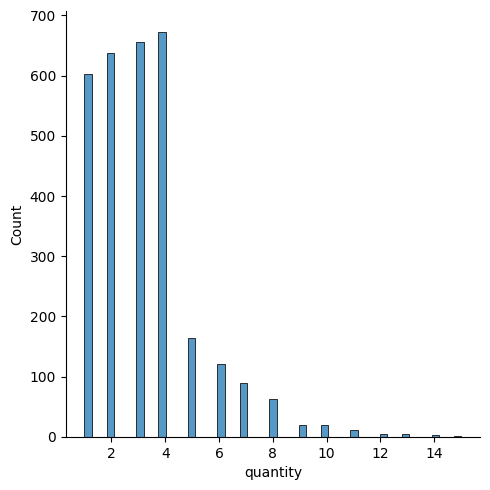

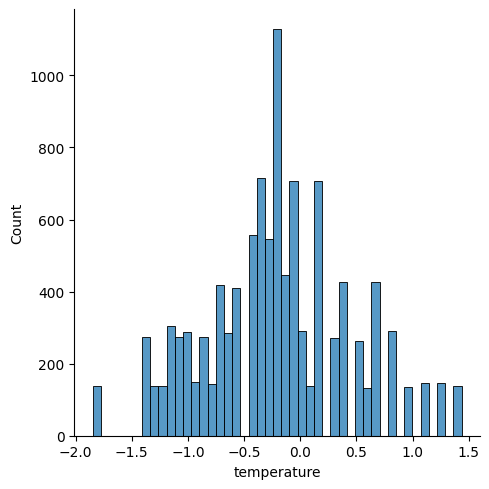

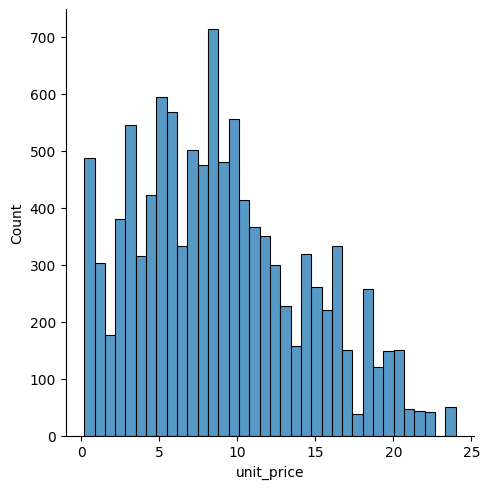

In [33]:
non_cylic_num_features = ['quantity','temperature','unit_price']

for f in non_cylic_num_features:
    sns.displot(data=merged_df, x=f)

### When we look at these distributions , only temperature looks like Guassian one so we will proceed with Z-Score with temperature and min-max scaling with the other two .
### Remark : we should perform the min-max scaling just once to keep the values between 0 and 1 .

In [34]:
class Scaler():
    def __init__(self, scaler_type:str):
        self.scaler_type = scaler_type

    def transform(self, data:pd.core.series.Series) -> pd.core.series.Series:
        if self.scaler_type == 'minmax':
            min, max = (data.min(), data.max())
            return (data - min) / (max - min)
        elif self.scaler_type == 'zscore':
            std, mean = (data.std(), data.mean())
            return (data - mean) / std
        else:
            raise Exception('Scaler type not defined')

In [35]:
mm_scaler = Scaler('minmax')
zscore_scaler = Scaler('zscore')

merged_df['temperature'] = zscore_scaler.transform(merged_df['temperature'])
merged_df['quantity'] = mm_scaler.transform(merged_df['quantity'])
merged_df['unit_price'] = mm_scaler.transform(merged_df['unit_price'])

merged_df

,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,day_of_week,day_of_month,hour
0,0.142857,0.89,0.284495,0.462185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
1,0.142857,0.14,0.284495,0.054622,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,9
2,NaN,0.67,0.284495,0.588235,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
3,NaN,0.82,0.284495,0.840336,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
4,NaN,0.05,0.284495,0.336134,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.214286,0.50,0.074808,0.201681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10841,NaN,0.26,0.074808,0.831933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10842,0.142857,0.78,0.074808,0.285714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19
10843,0.142857,0.92,0.074808,0.621849,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,19


### Cyclic feature encoding :
### We have three cyclic feature present in our datset ; hour, day of month and day of week , we will encode these features to make them of a cyclic nature .
### Thus, we will use sine and cosine .

In [36]:
import numpy as np

In [37]:
class CyclicEncoder():
    def __init__(self, hwm:str):
        self.hwm = hwm

    def sine(self, data:pd.core.series.Series) -> pd.core.series.Series:
        if self.hwm == 'h':
            return np.sin((data / 24) * 2 * np.pi)
        elif self.hwm == 'w':
            return np.sin((data / 7) * 2 * np.pi)
        elif self.hwm == 'm':
            return np.sin((data / 31) * 2 * np.pi)
        else:
            raise Exception('Unsupported value for the second positional argument {''h'',''w'',''m''}')

    def cosine(self, data:pd.core.series.Series) -> pd.core.series.Series:
        if self.hwm == 'h':
            return np.cos((data / 24) * 2 * np.pi)
        elif self.hwm == 'w':
            return np.cos((data / 7) * 2 * np.pi)
        elif self.hwm == 'm':
            return np.cos((data / 31) * 2 * np.pi)
        else:
            raise Exception('Unsupported value for the second positional argument {''h'',''w'',''m''}')

In [38]:
hour_cyclic_encoder = CyclicEncoder('h')
week_cyclic_encoder = CyclicEncoder('w')
month_cyclic_encoder = CyclicEncoder('m')

merged_df['sin_hour'] = hour_cyclic_encoder.sine(merged_df['hour'])
merged_df['cos_hour'] = hour_cyclic_encoder.cosine(merged_df['hour'])

merged_df['sin_dweek'] = hour_cyclic_encoder.sine(merged_df['day_of_week'])
merged_df['cos_dweek'] = hour_cyclic_encoder.cosine(merged_df['day_of_week'])

merged_df['sin_dmonth'] = hour_cyclic_encoder.sine(merged_df['day_of_month'])
merged_df['cos_dmonth'] = hour_cyclic_encoder.cosine(merged_df['day_of_month'])

merged_df

,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_vegetables,day_of_week,day_of_month,hour,sin_hour,cos_hour,sin_dweek,cos_dweek,sin_dmonth,cos_dmonth
0,0.142857,0.89,0.284495,0.462185,0,0,0,0,0,0,...,0,1,1,9,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926
1,0.142857,0.14,0.284495,0.054622,0,0,0,0,0,0,...,1,1,1,9,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926
2,NaN,0.67,0.284495,0.588235,1,0,0,0,0,0,...,0,1,1,9,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926
3,NaN,0.82,0.284495,0.840336,0,0,0,1,0,0,...,0,1,1,9,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926
4,NaN,0.05,0.284495,0.336134,0,0,0,0,0,0,...,0,1,1,9,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.214286,0.50,0.074808,0.201681,0,0,0,0,0,0,...,0,0,7,19,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819
10841,NaN,0.26,0.074808,0.831933,0,0,0,0,0,0,...,0,0,7,19,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819
10842,0.142857,0.78,0.074808,0.285714,0,0,0,0,0,0,...,0,0,7,19,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819
10843,0.142857,0.92,0.074808,0.621849,0,0,0,0,0,0,...,0,0,7,19,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819


<Axes: xlabel='sin_hour', ylabel='cos_hour'>

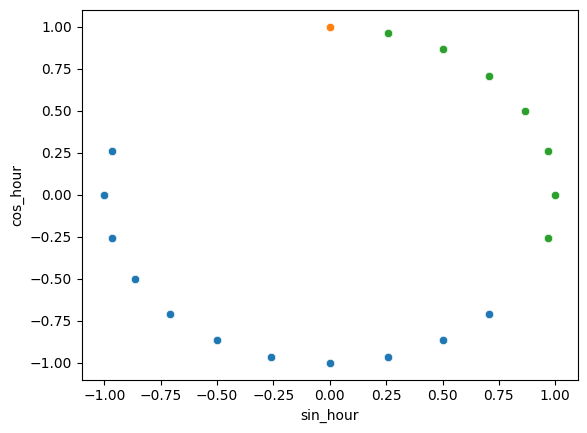

In [39]:
sns.scatterplot(data=merged_df, x='sin_hour', y='cos_hour')
sns.scatterplot(data=merged_df, x='sin_dweek', y='cos_dweek')
sns.scatterplot(data=merged_df, x='sin_dmonth', y='cos_dmonth')

### When we plot these new features together we can see their cyclic nature .

In [40]:
merged_df = merged_df.drop(columns=['hour','day_of_week','day_of_month'])

<Axes: >

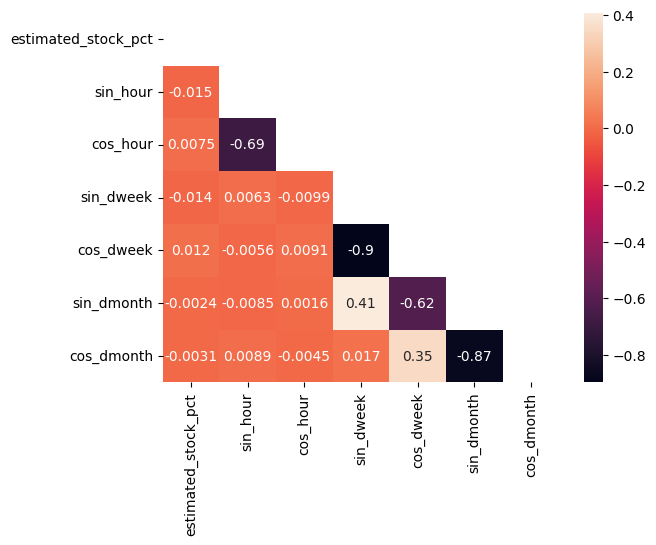

In [41]:
corr_df = merged_df[['estimated_stock_pct','sin_hour','cos_hour','sin_dweek','cos_dweek','sin_dmonth','cos_dmonth']]

corr = corr_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True)

### This correlation matrix tells us that these encoded features are not correlated with our label , but , each cosine is strongly correlated with sine .
### Thus , we will create other features from crossing them together and wish to get good results .

In [42]:
merged_df['hour_cross'] = merged_df['cos_hour'] * merged_df['sin_hour']
merged_df['dweek_cross'] = merged_df['cos_dweek'] * merged_df['sin_dweek']
merged_df['dmonth_cross'] = merged_df['cos_dmonth'] * merged_df['sin_dmonth']

merged_df

,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_vegetables,sin_hour,cos_hour,sin_dweek,cos_dweek,sin_dmonth,cos_dmonth,hour_cross,dweek_cross,dmonth_cross
0,0.142857,0.89,0.284495,0.462185,0,0,0,0,0,0,...,0,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926,-0.50,0.25,0.25
1,0.142857,0.14,0.284495,0.054622,0,0,0,0,0,0,...,1,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926,-0.50,0.25,0.25
2,NaN,0.67,0.284495,0.588235,1,0,0,0,0,0,...,0,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926,-0.50,0.25,0.25
3,NaN,0.82,0.284495,0.840336,0,0,0,1,0,0,...,0,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926,-0.50,0.25,0.25
4,NaN,0.05,0.284495,0.336134,0,0,0,0,0,0,...,0,0.707107,-0.707107,0.258819,0.965926,0.258819,0.965926,-0.50,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.214286,0.50,0.074808,0.201681,0,0,0,0,0,0,...,0,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819,-0.25,0.00,-0.25
10841,NaN,0.26,0.074808,0.831933,0,0,0,0,0,0,...,0,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819,-0.25,0.00,-0.25
10842,0.142857,0.78,0.074808,0.285714,0,0,0,0,0,0,...,0,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819,-0.25,0.00,-0.25
10843,0.142857,0.92,0.074808,0.621849,0,0,0,0,0,0,...,0,-0.965926,0.258819,0.000000,1.000000,0.965926,-0.258819,-0.25,0.00,-0.25


<Axes: >

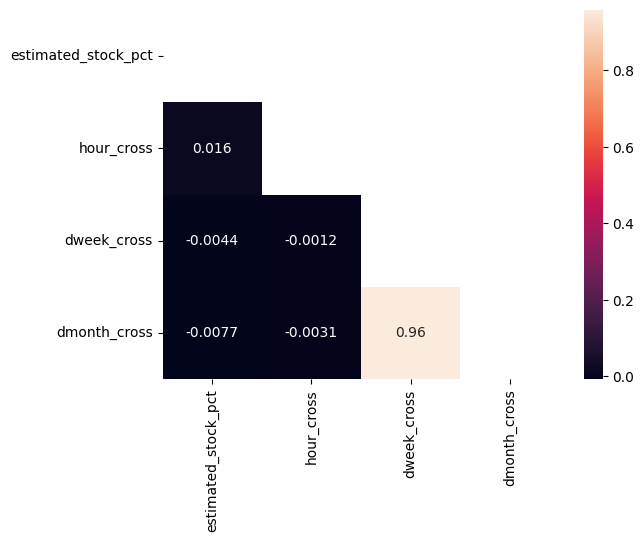

In [43]:
corr_df = merged_df[['estimated_stock_pct','hour_cross','dweek_cross','dmonth_cross']]
corr = corr_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True)

### Still no correlation , this pushes us to use non-linearity for our model : so next in the modelling phase we will try two basic models :

1.   XGBoost
2.   Neural Network



In [44]:
final_df = merged_df.drop(columns=['cos_hour','sin_hour','cos_dweek','sin_dweek','cos_dmonth','sin_dmonth'])
final_df

,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,hour_cross,dweek_cross,dmonth_cross
0,0.142857,0.89,0.284495,0.462185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.50,0.25,0.25
1,0.142857,0.14,0.284495,0.054622,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.50,0.25,0.25
2,NaN,0.67,0.284495,0.588235,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.50,0.25,0.25
3,NaN,0.82,0.284495,0.840336,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.50,0.25,0.25
4,NaN,0.05,0.284495,0.336134,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.50,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.214286,0.50,0.074808,0.201681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.25,0.00,-0.25
10841,NaN,0.26,0.074808,0.831933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.25,0.00,-0.25
10842,0.142857,0.78,0.074808,0.285714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.25,0.00,-0.25
10843,0.142857,0.92,0.074808,0.621849,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.25,0.00,-0.25


## Section 6 - Modelling

### Baseline model :
### Our problem is a regression problem so linear regression will be an excellent baseline model .
### Previously, we anticipated that we will use XGBoost and Neural Network . But , we have to establish a baseline model for later error analysis and model selection .

In [45]:
data_with_nan = final_df
data_without_nan = final_df.fillna(value=0)

In [46]:
X, y = data_without_nan.drop(columns=['estimated_stock_pct']), data_without_nan['estimated_stock_pct']
X_nan, y_nan = data_with_nan.drop(columns=['estimated_stock_pct']), data_with_nan['estimated_stock_pct']

In [47]:
!pip install xgboost

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import tensorflow as tf

In [49]:
baseline_model = LinearRegression()

mse_scores_baseline_train = []
mse_scores_baseline_test = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    baseline_model.fit(X_train, y_train)

    train_predictions = baseline_model.predict(X_train)
    mse = mean_squared_error(y_train, train_predictions)
    mse_scores_baseline_train.append(mse)

    test_predictions = baseline_model.predict(X_test)
    mse = mean_squared_error(y_test, test_predictions)
    mse_scores_baseline_test.append(mse)

print(f'Training MSE : {np.mean(mse_scores_baseline_train)} \nTesting MSE : {np.mean(mse_scores_baseline_test)}')

Training MSE : 0.06976474622260921 
Testing MSE : 0.07017505017612372


### The baseline model is giving a great result . Good for us , we established a very solid baseline and we hope that the neural network and/or XGBoost models can outperform this simple linear model .

...